In [1]:
import sys
import sklearn
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [114]:
url='https://raw.githubusercontent.com/sbkowshik/energy-consumption-prediction/main/Household_electricity_dataset.csv'
df1 = pd.read_csv(url)
df1

,Date,Value,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,...,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipitation,day_of_week,Day.1
0,01-06-2016,29.691,1,85,74.8,68,74,71.4,66,100,...,65,21,9.5,0,29.8,29.8,29.7,0.00,2,1
1,02-06-2016,28.789,2,76,71.2,66,74,70.3,66,100,...,89,18,7.8,0,29.8,29.8,29.7,4.33,5,2
2,03-06-2016,19.247,3,79,72.1,68,72,70.0,68,100,...,72,18,4.7,0,29.8,29.8,29.7,3.18,6,3
3,04-06-2016,22.883,4,76,71.2,69,73,70.0,66,100,...,85,20,7.0,0,29.8,29.7,29.7,2.37,2,4
4,05-06-2016,25.195,5,82,73.8,68,72,70.0,68,100,...,62,17,7.7,0,29.7,29.7,29.7,0.39,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,03-07-2020,39.659,3,96,84.7,74,76,72.8,67,91,...,38,24,6.3,0,29.9,29.9,29.8,0.00,5,1494
1494,04-07-2020,38.071,4,97,84.6,73,76,72.9,70,94,...,43,10,3.6,0,29.9,29.8,29.7,0.00,1,1495
1495,05-07-2020,36.565,5,95,85.4,79,75,73.5,68,88,...,44,12,6.2,0,29.8,29.7,29.7,0.00,3,1496
1496,06-07-2020,39.900,6,91,85.5,82,77,75.5,72,82,...,59,10,6.0,0,29.8,29.8,29.7,0.00,6,1497


In [115]:
df1.head()

,Date,Value,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,...,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipitation,day_of_week,Day.1
0,01-06-2016,29.691,1,85,74.8,68,74,71.4,66,100,...,65,21,9.5,0,29.8,29.8,29.7,0.00,2,1
1,02-06-2016,28.789,2,76,71.2,66,74,70.3,66,100,...,89,18,7.8,0,29.8,29.8,29.7,4.33,5,2
2,03-06-2016,19.247,3,79,72.1,68,72,70.0,68,100,...,72,18,4.7,0,29.8,29.8,29.7,3.18,6,3
3,04-06-2016,22.883,4,76,71.2,69,73,70.0,66,100,...,85,20,7.0,0,29.8,29.7,29.7,2.37,2,4
4,05-06-2016,25.195,5,82,73.8,68,72,70.0,68,100,...,62,17,7.7,0,29.7,29.7,29.7,0.39,4,5


In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1498 non-null   object 
 1   Value          1498 non-null   float64
 2   Day            1498 non-null   int64  
 3   Temp_max       1498 non-null   int64  
 4   Temp_avg       1498 non-null   float64
 5   Temp_min       1498 non-null   int64  
 6   Dew_max        1498 non-null   int64  
 7   Dew_avg        1498 non-null   float64
 8   Dew_min        1498 non-null   int64  
 9   Hum_max        1498 non-null   int64  
 10  Hum_avg        1498 non-null   float64
 11  Hum_min        1498 non-null   int64  
 12  Wind_max       1498 non-null   int64  
 13  Wind_avg       1498 non-null   float64
 14  Wind_min       1498 non-null   int64  
 15  Press_max      1498 non-null   float64
 16  Press_avg      1498 non-null   float64
 17  Press_min      1498 non-null   float64
 18  Precipit

In [117]:
df1.shape

(1498, 21)

In [118]:
df1.describe()

,Value,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipitation,day_of_week,Day.1
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,21.399148,15.670227,80.786382,71.277236,62.888518,66.261015,61.734579,56.506676,92.624166,74.487517,51.401869,15.899866,7.769025,1.391188,29.977303,29.906142,29.814753,0.160067,2.997330,749.500000
std,12.635139,8.817041,12.652164,12.443023,13.493124,12.348885,13.685235,15.229231,7.748873,11.810572,15.718254,4.853153,3.007910,2.516049,0.167357,0.162033,0.787233,0.668120,1.999664,432.579665
min,4.610000,1.000000,34.000000,27.600000,19.000000,18.000000,13.200000,10.000000,50.000000,31.500000,15.000000,6.000000,1.600000,0.000000,29.500000,28.800000,0.000000,0.000000,0.000000,1.000000
25%,10.828750,8.000000,73.000000,62.900000,52.000000,60.250000,53.500000,45.000000,90.000000,67.500000,41.000000,13.000000,5.700000,0.000000,29.900000,29.800000,29.700000,0.000000,1.000000,375.250000
50%,16.833500,16.000000,83.000000,73.800000,67.000000,70.000000,65.950000,62.000000,94.000000,75.200000,50.000000,15.000000,7.300000,0.000000,29.900000,29.900000,29.800000,0.000000,3.000000,749.500000
75%,30.726250,23.000000,91.000000,81.600000,75.000000,76.000000,73.100000,70.000000,100.000000,82.800000,61.000000,18.000000,9.500000,3.000000,30.100000,30.000000,29.900000,0.020000,5.000000,1123.750000
max,78.225300,31.000000,101.000000,90.000000,83.000000,83.000000,79.800000,78.000000,100.000000,99.900000,97.000000,39.000000,23.900000,17.000000,30.600000,30.600000,30.500000,13.430000,6.000000,1498.000000


In [119]:
def forecasts(act,pred):
    scores=[]
    for i in range(act.shape[1]):
        mse=mean_squared_error(act[:,i],pred[:,i])
        rmse=np.sqrt(mse)
        scores.append(rmse)
    s=0
    for row in range(act.shape[0]):
        for col in range(act.shape[1]):
            s+=(act[row,col]-pred[row,col])**2
    score=np.sqrt(s/(act.shape[0]*act.shape[1]))
    return score,scores

In [120]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.set_index('Date')
df1

<ipython-input-120-5653073d8fff>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Date'] = pd.to_datetime(df1['Date'])


,Value,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipitation,day_of_week,Day.1
Date,,,,,,,,,,,,,,,,,,,,
2016-01-06,29.691,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2,1
2016-02-06,28.789,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5,2
2016-03-06,19.247,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6,3
2016-04-06,22.883,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2,4
2016-05-06,25.195,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-07,39.659,3,96,84.7,74,76,72.8,67,91,69.6,38,24,6.3,0,29.9,29.9,29.8,0.00,5,1494
2020-04-07,38.071,4,97,84.6,73,76,72.9,70,94,70.5,43,10,3.6,0,29.9,29.8,29.7,0.00,1,1495
2020-05-07,36.565,5,95,85.4,79,75,73.5,68,88,69.0,44,12,6.2,0,29.8,29.7,29.7,0.00,3,1496


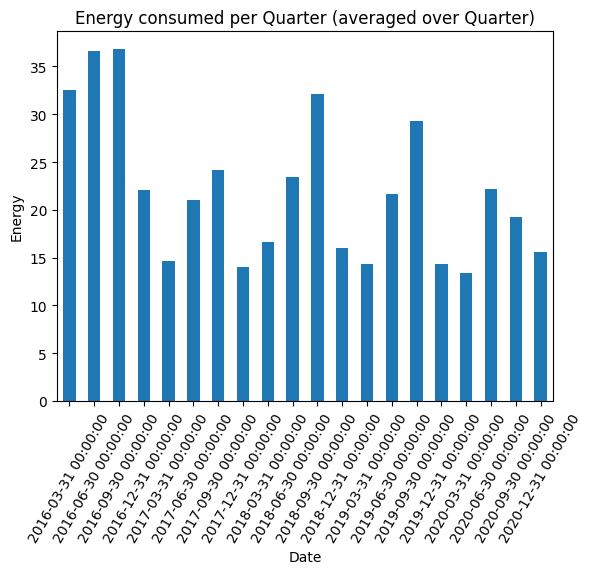

In [121]:
df1['Value'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Energy')
plt.title('Energy consumed per Quarter (averaged over Quarter)')
plt.show()

In [122]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [123]:
values = df1.values
values
alues = values.astype('float32')

In [124]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.340704   0.000000   0.761194   0.756410   0.765625   0.861538   
2   0.328451   0.033333   0.626866   0.698718   0.734375   0.861538   
3   0.198831   0.066667   0.671642   0.713141   0.765625   0.830769   
4   0.248223   0.100000   0.626866   0.698718   0.781250   0.846154   
5   0.279629   0.133333   0.716418   0.740385   0.765625   0.830769   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var11(t)  var12(t)  \
1   0.873874   0.823529        1.0    0.846491  ...  0.902439  0.363636   
2   0.857357   0.823529        1.0    0.954678  ...  0.695122  0.363636   
3   0.852853   0.852941        1.0    0.907895  ...  0.853659  0.424242   
4   0.852853   0.823529        1.0    0.944444  ...  0.573171  0.333333   
5   0.852853   0.852941        1.0    0.836257  ...  0.463415  0.060606   

   var13(t)  var14(t)  var15(t)  var16(t)  var17(t)  var18(t)  var19(t)  \
1  0.278027       0.0  0.272727  0.555556  0.97

In [49]:

# split into train and test sets
#values = reframed.values

#n_train_time = 365
#train = values[:n_train_time, :]
#test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
#train_X, train_y = train[:, :-1], train[:, -1]
#test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

Epoch 1/30
4/4 - 3s - loss: 0.0042 - val_loss: 0.1777 - 3s/epoch - 702ms/step
Epoch 2/30
4/4 - 0s - loss: 0.0205 - val_loss: 0.3028 - 113ms/epoch - 28ms/step
Epoch 3/30
4/4 - 0s - loss: 0.0102 - val_loss: 0.3337 - 107ms/epoch - 27ms/step
Epoch 4/30
4/4 - 0s - loss: 0.0063 - val_loss: 0.2590 - 115ms/epoch - 29ms/step
Epoch 5/30
4/4 - 0s - loss: 0.0051 - val_loss: 0.2168 - 106ms/epoch - 26ms/step
Epoch 6/30
4/4 - 0s - loss: 0.0085 - val_loss: 0.2379 - 88ms/epoch - 22ms/step
Epoch 7/30
4/4 - 0s - loss: 0.0065 - val_loss: 0.2699 - 115ms/epoch - 29ms/step
Epoch 8/30
4/4 - 0s - loss: 0.0052 - val_loss: 0.2668 - 108ms/epoch - 27ms/step
Epoch 9/30
4/4 - 0s - loss: 0.0041 - val_loss: 0.2412 - 71ms/epoch - 18ms/step
Epoch 10/30
4/4 - 0s - loss: 0.0043 - val_loss: 0.2295 - 82ms/epoch - 20ms/step
Epoch 11/30
4/4 - 0s - loss: 0.0045 - val_loss: 0.2355 - 107ms/epoch - 27ms/step
Epoch 12/30
4/4 - 0s - loss: 0.0042 - val_loss: 0.2412 - 109ms/epoch - 27ms/step
Epoch 13/30
4/4 - 0s - loss: 0.0036 - val_

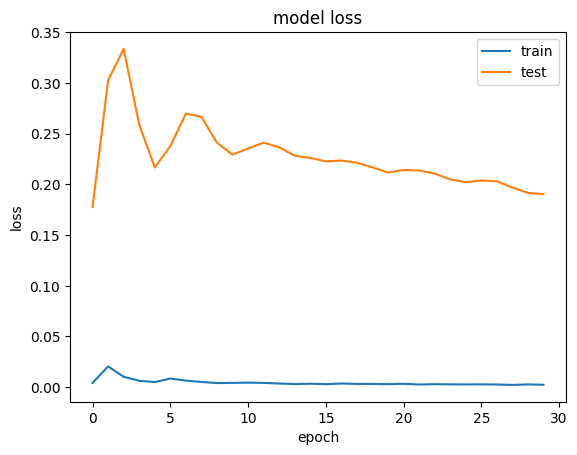

In [45]:
#model = Sequential()
#model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
#history = model.fit(train_X, train_y, epochs=30, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper right')
#plt.show()



In [46]:
# make a prediction
#yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0],39))
#yu=test_X.shape
#print(yu)
# invert scaling for forecast
#inv_yhat = np.concatenate((yhat, test_X[:, -38:]), axis=1)



36/36 [==============================] - 0s 2ms/step
(1132, 39)


In [47]:
#print(test_X.shape)
#print(yhat.shape)
#print(inv_yhat.shape)

(1132, 39)
(1132, 1)
(1132, 39)


In [50]:
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
#inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]
# calculate RMSE
#rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
#print('Test RMSE: %.3f' % rmse)

In [125]:
def split(data):
    train,test=data[1:-328],data[-328:-6]
    train=np.array(np.split(train,len(train)/7))
    test=np.array(np.split(test,len(test)/7))
    return train,test

In [126]:
def summarized_scores(name,score,scores):
    s_scores=', '.join(['%.1f'%s for s in scores])
    print('%s:[%.3f] %s'%(name,score,s_scores))

In [127]:
def to_supervized(train,n_in,n_out):
    data=train.reshape((train.shape[0]*train.shape[1],train.shape[2]))
    X,y=[],[]
    in_start=0
    for i in range(len(data)):
        in_end=in_start+n_in
        out_end=in_end+n_out
        if out_end<len(data):
            x_in=data[in_start:in_end,0]
            x_in=x_in.reshape((len(x_in),1))
            X.append(x_in)
            y.append(data[in_end:out_end,0])
        in_start+=1
    return np.array(X),np.array(y)

In [92]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

In [128]:
def build_model(train,n_input):
    train_x,train_y=to_supervized(train,n_input,7)
    verbose=0
    epochs=70
    batch_size=16
    n_timesteps=train_x.shape[1]
    n_features=train_x.shape[2]
    n_outputs=train_y.shape[1]
    model=Sequential()
    model.add(LSTM(200,activation='relu',input_shape=(n_timesteps,n_features)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse',optimizer='adam')
    model.fit(train_x,train_y,epochs=epochs,batch_size=batch_size,verbose=verbose)
    return model


In [129]:
def forecast(model,history,n_input):
    data=np.array(history)
    data=data.reshape((data.shape[0]*data.shape[1],data.shape[2]))
    in_x=data[-n_input:,0]
    in_x=in_x.reshape((1,len(in_x),1))
    yhat=model.predict(in_x,verbose=0)
    return yhat[0]

In [130]:
def evaluate_model(train,test,n_input):
    model=build_model(train,n_input)
    history=[x for x in train]
    prediction=[]
    for i in range(len(test)):
        yhat_s=forecast(model,history,n_input)
        prediction.append(yhat_s)
        history.append(test[i,:])
    prediction=np.array(prediction)
    score,scores=forecasts(test[:,:,0],prediction)
    return score,scores

In [131]:
df=df1.values
df1.shape

(1498, 20)

In [132]:
train,test=split(df1.values)

In [133]:
import numpy as np
train.shape


(167, 7, 20)

In [134]:
test.shape

(46, 7, 20)

In [135]:
score,scores=evaluate_model(train,test,14)

In [136]:
summarized_scores('lstm',score,scores)

lstm:[6.286] 4.7, 6.1, 5.2, 5.7, 6.5, 7.8, 7.5


In [137]:
days=['sun','mon','tue','wed','thr','fri','sat']

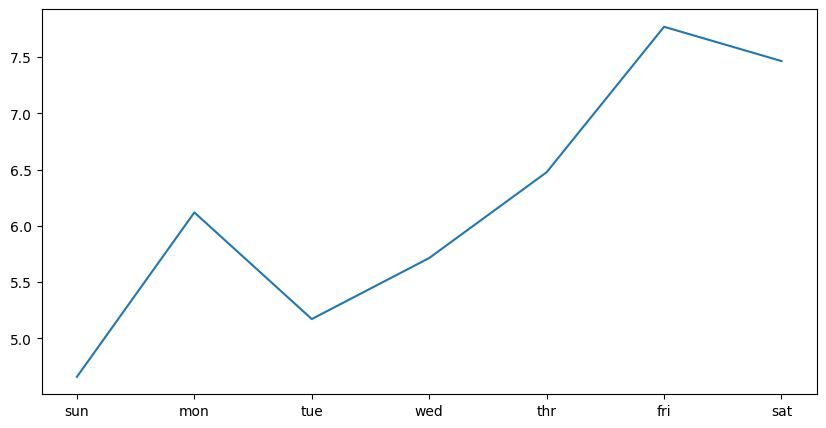

In [138]:
plt.figure(figsize=(10,5))
plt.plot(days,scores)